## <center>Example from Data Science Meetup <br> Presented 11/8/2018 by Gabriela Stegmann</center>

* I moved the R code into a Jupyter Notebook/R Kernel.
* Site of original from Gabriela https://github.com/gabistegmann/Data-Science-Meetup-11-8-18-Materials
* Made a few minor changes so I could play with R a bit.
* rpart documentation (https://www.rdocumentation.org/packages/rpart/versions/4.1-13/topics/rpart)
* rpart.plot documentation (https://www.rdocumentation.org/packages/rpart.plot/versions/3.0.4/topics/rpart.plot)
* Info on regression trees - https://www.solver.com/regression-trees

In [8]:
#setwd("C:/Users/Chester Qualls/Dropbox/Jupyter Notebooks/Misc Data")
#setwd("https://raw.githubusercontent.com/chesterqualls/Data-Science-Meetup-11-8-18-Materials/master/")

In [1]:
# install.packages("rpart")
# install.packages("rpart.plot")

library(rpart)
library(rpart.plot)


In [2]:
# Early Childhood Longitudinal Study - Kindergarten cohort of 1998-1999 (ECLSK)
# https://nces.ed.gov/ecls/kindergarten.asp


DATA <- read.table("https://raw.githubusercontent.com/chesterqualls/Data-Science-Meetup-11-8-18-Materials/master/ECLSK.dat", 
                  header = TRUE)

DATA

GENDER,POVRTY,RACE,KINDER1,FMOTOR,GMOTOR,SCONTROL,INTERP,EXTERN,INTERN,GENERAL,MATH7,MOM_ED
2,2,1,1,6,8,3.50,4.0,1.0,1.25,38,2.16,3
1,2,1,1,6,2,2.00,2.2,2.8,2.25,19,1.14,6
2,2,4,1,8,8,4.00,4.0,1.2,1.25,33,2.04,8
2,2,1,1,6,7,3.25,3.2,1.2,2.75,27,1.42,7
1,1,1,1,7,5,3.00,2.2,1.8,1.25,23,1.70,3
2,2,1,1,5,6,3.50,3.4,1.6,1.50,25,2.00,6
2,2,1,1,7,3,1.50,2.0,3.6,2.25,15,1.26,4
2,2,1,1,5,3,2.75,2.8,1.4,1.25,28,1.40,5
1,2,1,2,8,8,3.00,2.8,1.8,1.50,34,1.69,5
2,2,1,2,5,7,3.50,3.2,1.0,2.00,38,2.20,3


In [3]:
# Math scores measured in 8th grade. This is what we are trying to predict.
# All other variables measured at kindergarten.

# GENDER: 1 = MALE
# RACE: 1 = White; 2 = Black/AfAm; 3 = Hisp; 4 = All other

DATA$RACE <- as.factor(DATA$RACE)
cat('Summary Statistics - Different data types summarize as appropriate')  
summary(DATA)
cat('\nSummary of Race Data - RACE: 1 = White; 2 = Black/AfAm; 3 = Hisp; 4 = All other')
summary(DATA$RACE)

Summary Statistics - Different data types summarize as appropriate

     GENDER          POVRTY     RACE        KINDER1          FMOTOR     
 Min.   :1.000   Min.   :1.00   1:4349   Min.   :1.000   Min.   :0.000  
 1st Qu.:1.000   1st Qu.:2.00   2: 644   1st Qu.:1.000   1st Qu.:5.000  
 Median :2.000   Median :2.00   3: 753   Median :1.000   Median :6.000  
 Mean   :1.502   Mean   :1.88   4: 625   Mean   :1.035   Mean   :6.123  
 3rd Qu.:2.000   3rd Qu.:2.00            3rd Qu.:1.000   3rd Qu.:8.000  
 Max.   :2.000   Max.   :2.00            Max.   :2.000   Max.   :9.000  
     GMOTOR         SCONTROL         INTERP          EXTERN          INTERN    
 Min.   :0.000   Min.   :1.000   Min.   :1.200   Min.   :1.000   Min.   :1.00  
 1st Qu.:6.000   1st Qu.:2.750   1st Qu.:2.600   1st Qu.:1.000   1st Qu.:1.00  
 Median :7.000   Median :3.250   Median :3.000   Median :1.400   Median :1.25  
 Mean   :6.464   Mean   :3.152   Mean   :3.057   Mean   :1.564   Mean   :1.49  
 3rd Qu.:8.000   3rd Qu.:3.500   3rd Qu.:3.600   3rd Qu.:2.000   3rd Qu.:1.75  
 Max.   :


Summary of Race Data - RACE: 1 = White; 2 = Black/AfAm; 3 = Hisp; 4 = All other

1    2    3    4 
4349  644  753  625

In [4]:
# Split into training and testing sets

N <- nrow(DATA)
n_training <- floor(N*3/4)
training_rows <- 1:n_training

TRAINING <- DATA[training_rows,]
TESTING <- DATA[-training_rows,]

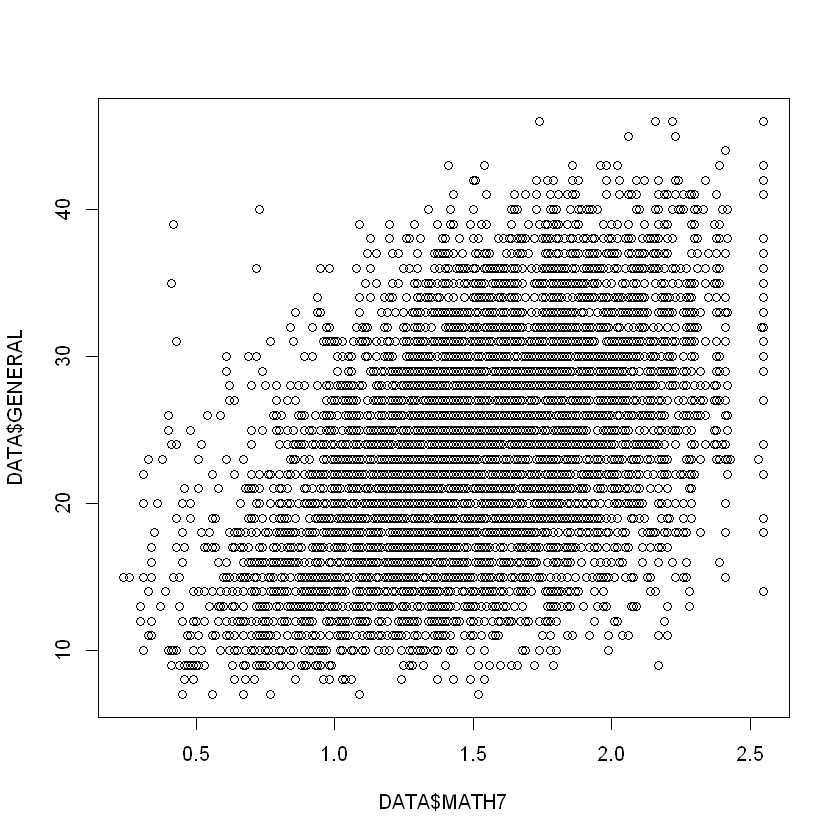

In [5]:
plot(DATA$MATH7,DATA$GENERAL)


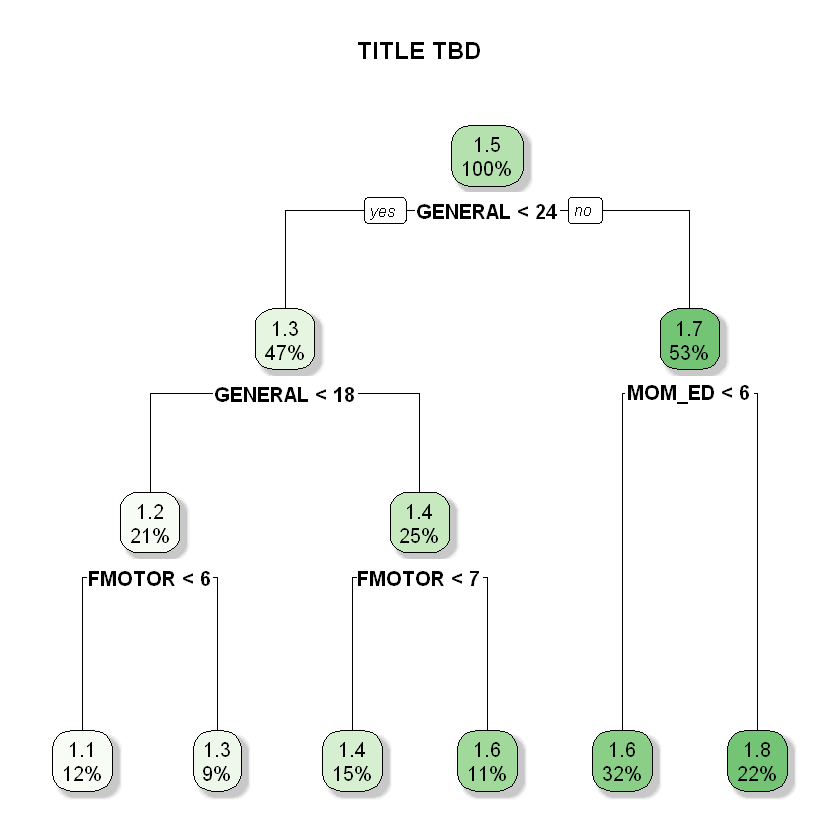

In [6]:
## Regression Tree

Tree1 = rpart(MATH7 ~  GENDER + POVRTY + RACE + KINDER1 +
             FMOTOR + GMOTOR + SCONTROL + INTERP + EXTERN + 
             INTERN + GENERAL + MOM_ED,
           data = TRAINING)

rpart.plot(Tree1, box.palette = "Greens", shadow.col = '#c8c8c8',main='TITLE TBD')


#prediction before pruning
pred = predict(Tree1, TESTING)

In [7]:
# R^2 = cor(pred,y)^2
cor(pred, TESTING$MATH7)^2

### Cross-validated Tree

Tree2 <- rpart(MATH7 ~  GENDER + POVRTY + RACE + KINDER1 +
               FMOTOR + GMOTOR + SCONTROL + INTERP + EXTERN + 
               INTERN + GENERAL + MOM_ED,
             data = TRAINING,
             control = rpart.control(cp = .0005))

Tree2$cptable

[1] 0.2232665

,CP,nsplit,rel error,xerror,xstd
1,0.168101026,0,1.0000000,1.0003824,0.01883931
2,0.040132447,1,0.8318990,0.8405401,0.01642797
3,0.024691577,2,0.7917665,0.8059667,0.01578494
4,0.016451165,3,0.7670750,0.7781469,0.01532430
5,0.012602638,4,0.7506238,0.7636303,0.01524999
6,0.008840782,5,0.7380211,0.7510152,0.01519058
7,0.007361570,6,0.7291804,0.7424779,0.01511024
8,0.006567605,7,0.7218188,0.7403589,0.01510223
9,0.006347176,8,0.7152512,0.7397772,0.01509292
10,0.006086575,9,0.7089040,0.7393538,0.01506289


Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

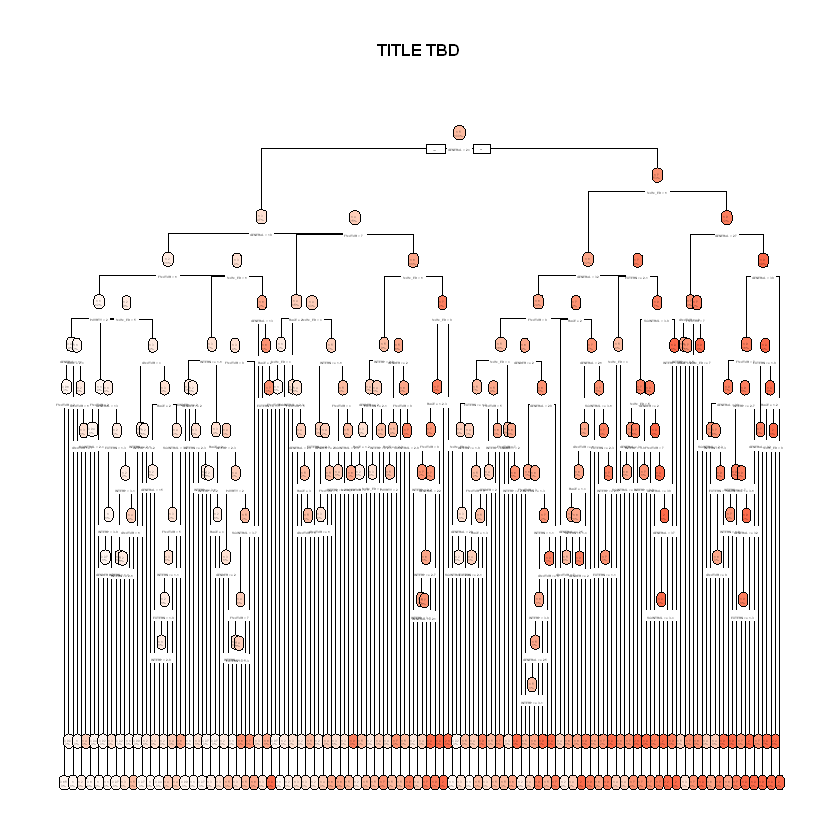

In [8]:
rpart.plot(Tree2, box.palette = "Reds",main='TITLE TBD')

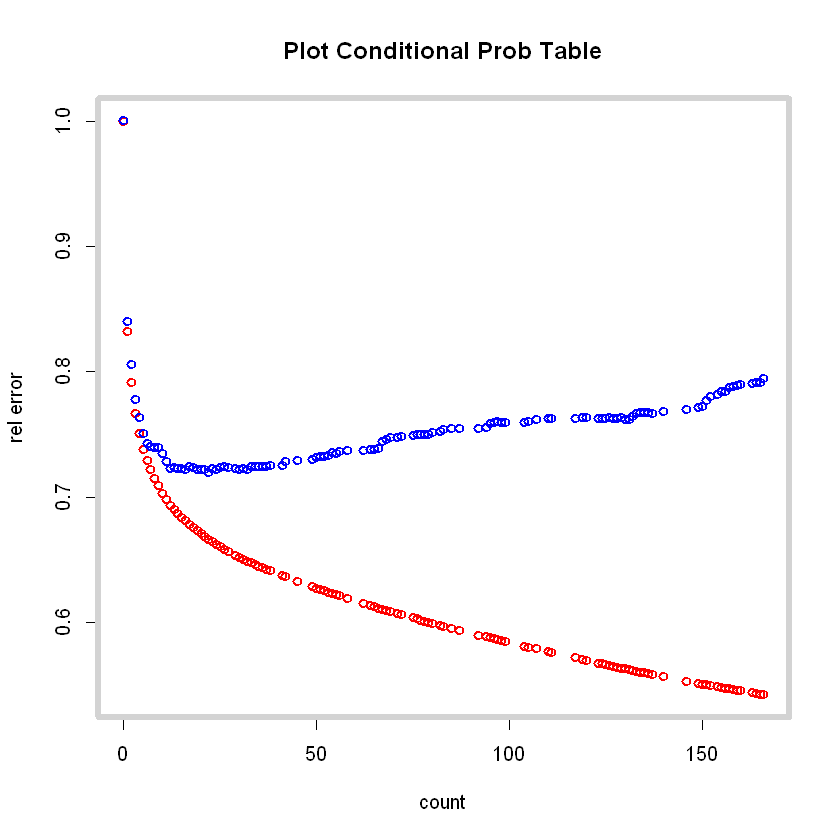

In [9]:
plot(Tree2$cptable[,2], Tree2$cptable[,3], type = "p",col="red", lwd = 2,
    ylab='rel error',
    xlab='count',
    main='Plot Conditional Prob Table')
lines(Tree2$cptable[,2], Tree2$cptable[,4], type= 'p',col="blue", lwd = 2)
box(bty="o",col ="#d3d3d3",lwd=5,bg="#ffdb58")


In [10]:
minCP = Tree2$cptable[which.min(Tree2$cptable[,4]),1]

cat("Minimum Value from Conditional Probability Table: ", minCP)

Minimum Value from Conditional Probability Table:  0.002142359

In [11]:
Tree.pruned = prune.rpart(Tree2, cp = minCP)
Tree.pruned

n= 4778 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 4778 871.799100 1.5225660  
   2) GENERAL< 23.5 2222 383.751200 1.3347300  
     4) GENERAL< 17.5 1009 176.576000 1.1971460  
       8) FMOTOR< 5.5 572  87.098870 1.0929370  
        16) POVRTY< 1.5 206  22.438370 0.9517476  
          32) GENERAL< 13.5 126  11.020350 0.8606349 *
          33) GENERAL>=13.5 80   8.724595 1.0952500 *
        17) POVRTY>=1.5 366  58.242680 1.1724040  
          34) MOM_ED< 4.5 195  27.860900 1.0940510 *
          35) MOM_ED>=4.5 171  27.819470 1.2617540 *
       9) FMOTOR>=5.5 437  75.135000 1.3335470  
        18) MOM_ED< 5.5 358  56.274180 1.2797770  
          36) INTERN>=1.585 143  18.977570 1.1751050 *
          37) INTERN< 1.585 215  34.687820 1.3493950  
            74) FMOTOR< 8.5 193  30.154690 1.3178240 *
            75) FMOTOR>=8.5 22   2.653109 1.6263640 *
        19) MOM_ED>=5.5 79  13.135190 1.5772150 *
     5) GENERAL>=17.5 1213 172.187800 1.4491760  
      1

In [12]:
pred = predict(Tree.pruned, TESTING)

#cat('All Results: ')
#pred
#decided to reduce output of above

cat('First 10 results: ')
head(pred, n=10)
cat('...')
cat('\nLast 5 results: ')
tail(pred, n=5)

First 10 results: 

4779     4780     4781     4782     4783     4784     4785     4786 
1.317824 1.261754 1.583447 1.766433 1.450368 1.549726 1.661026 1.094051 
    4787     4788 
1.655961 1.766433

...
Last 5 results: 

6367     6368     6369     6370     6371 
1.261754 1.549726 1.546199 1.812551 1.095250

In [13]:
#R^2
cor(pred, TESTING$MATH7)^2

cat("Correlation: ", cor(pred, TESTING$MATH7)^2)

[1] 0.2670059

Correlation:  0.2670059

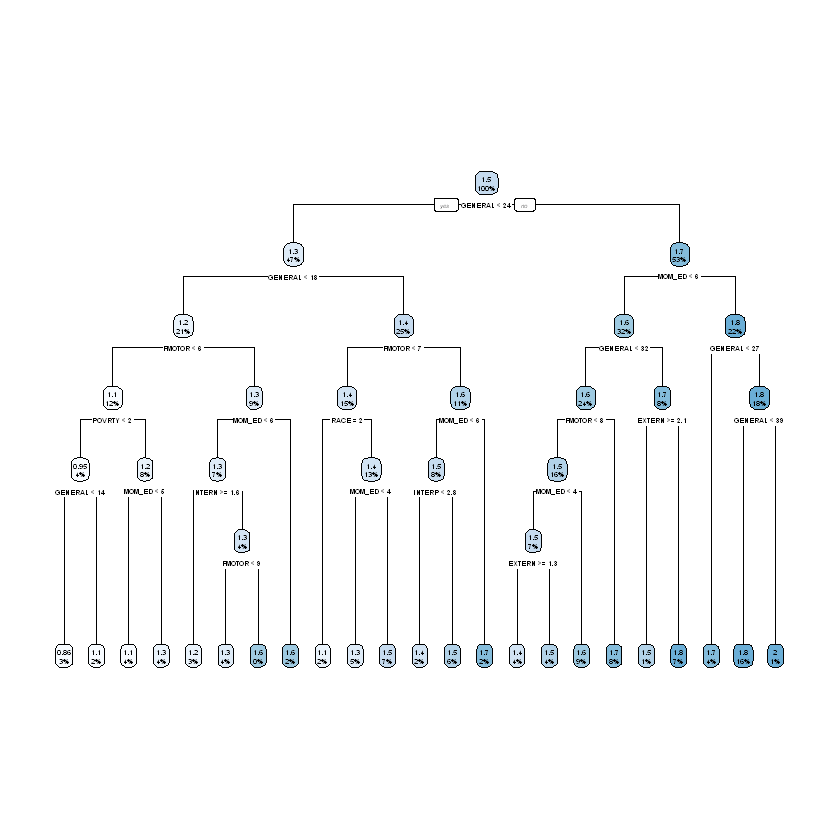

In [14]:
rpart.plot(Tree.pruned)

In [15]:
Tree.pruned

n= 4778 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 4778 871.799100 1.5225660  
   2) GENERAL< 23.5 2222 383.751200 1.3347300  
     4) GENERAL< 17.5 1009 176.576000 1.1971460  
       8) FMOTOR< 5.5 572  87.098870 1.0929370  
        16) POVRTY< 1.5 206  22.438370 0.9517476  
          32) GENERAL< 13.5 126  11.020350 0.8606349 *
          33) GENERAL>=13.5 80   8.724595 1.0952500 *
        17) POVRTY>=1.5 366  58.242680 1.1724040  
          34) MOM_ED< 4.5 195  27.860900 1.0940510 *
          35) MOM_ED>=4.5 171  27.819470 1.2617540 *
       9) FMOTOR>=5.5 437  75.135000 1.3335470  
        18) MOM_ED< 5.5 358  56.274180 1.2797770  
          36) INTERN>=1.585 143  18.977570 1.1751050 *
          37) INTERN< 1.585 215  34.687820 1.3493950  
            74) FMOTOR< 8.5 193  30.154690 1.3178240 *
            75) FMOTOR>=8.5 22   2.653109 1.6263640 *
        19) MOM_ED>=5.5 79  13.135190 1.5772150 *
     5) GENERAL>=17.5 1213 172.187800 1.4491760  
      1

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


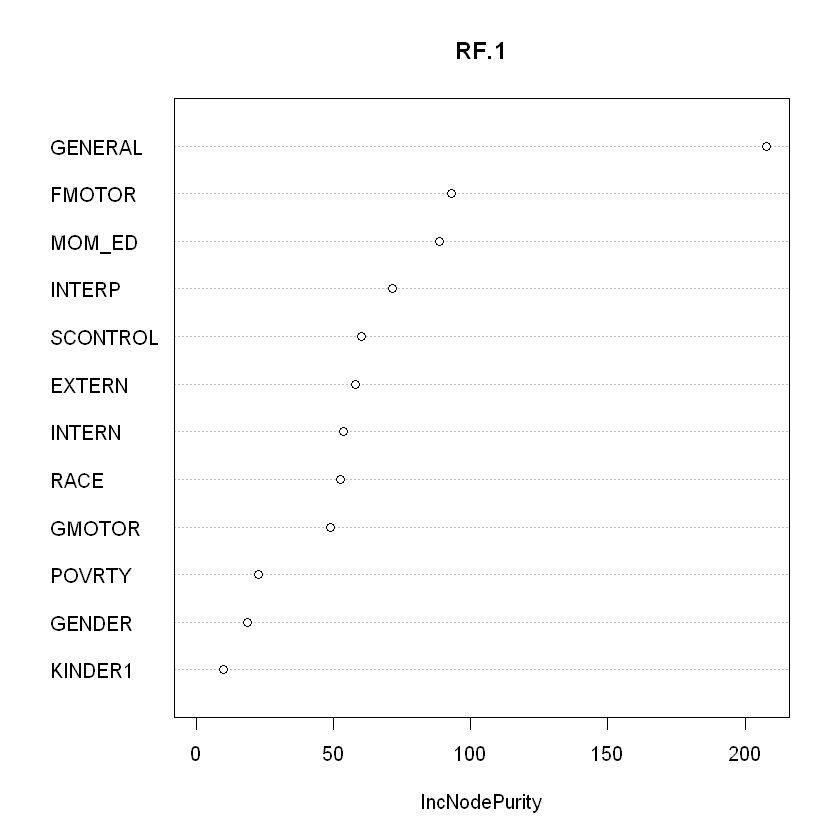

In [16]:
### RANDOM FOREST

# install.packages("randomForest")

library(randomForest)

RF.1 = randomForest(MATH7 ~  GENDER + POVRTY + RACE + KINDER1 +
               FMOTOR + GMOTOR + SCONTROL + INTERP + EXTERN + 
               INTERN + GENERAL + MOM_ED,
             data = TRAINING)

varImpPlot(RF.1)

pred = predict(RF.1, TESTING)

In [17]:
#R^2
cor(pred, TESTING$MATH7)^2

[1] 0.3121279